<a href="https://colab.research.google.com/github/kelvynlukito/DataScience_RandomForest_Classifier/blob/main/DataScience_RandomForest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest**

# **Import Modul**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Dataset**

In [64]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [65]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [66]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


# **Seperated Training and Testing Set**

In [67]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [69]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

300
100
300
100


# **Feature Scaling**

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
print(X_train)

[[-1.68062015e+00 -5.92416706e-01]
 [ 8.69241193e-01  5.63566526e-01]
 [-6.01832657e-01 -1.03702564e+00]
 [ 9.67312783e-01 -1.15558802e+00]
 [-2.09546297e-01 -5.62776110e-01]
 [ 1.82740063e-01  8.00691292e-01]
 [-4.05689477e-01  1.30458142e+00]
 [ 1.16345596e+00  5.04285335e-01]
 [ 7.71169603e-01  2.96801165e-01]
 [ 6.73098013e-01 -8.88822663e-01]
 [ 3.78883243e-01 -2.96010749e-01]
 [ 4.76954833e-01 -4.73854323e-01]
 [-2.09546297e-01  1.18957591e-01]
 [ 3.78883243e-01  8.93169951e-02]
 [-9.94119017e-01  8.00691292e-01]
 [-6.99904247e-01  1.39350321e+00]
 [ 3.78883243e-01 -5.03494919e-01]
 [ 3.78883243e-01 -5.03494919e-01]
 [-1.68062015e+00  3.85722952e-01]
 [ 8.69241193e-01 -8.29541472e-01]
 [-9.94119017e-01 -1.12594743e+00]
 [-2.09546297e-01  5.96763994e-02]
 [ 1.16345596e+00 -1.21486922e+00]
 [-2.09546297e-01  6.52488313e-01]
 [-1.34031173e-02  1.78238782e-01]
 [-5.03761067e-01  1.42314380e+00]
 [-1.11474707e-01  1.78238782e-01]
 [-1.68062015e+00  5.04285335e-01]
 [ 8.46684727e-02 -5

In [72]:
print(X_test)

[[-0.11147471 -1.06666624]
 [ 0.18274006 -0.23672956]
 [-0.11147471  1.4527844 ]
 [ 0.18274006  1.57134678]
 [-1.09219061  1.4527844 ]
 [ 0.08466847 -0.11816717]
 [-1.68062015 -0.97774445]
 [ 1.16345596  0.59320712]
 [-0.60183266 -1.51127517]
 [ 1.06538437  2.1345181 ]
 [-0.30761789  0.089317  ]
 [ 0.18274006  0.11895759]
 [-0.2095463   0.089317  ]
 [ 1.06538437  1.83811214]
 [ 1.55574232  0.38572295]
 [ 1.84995709  1.89739333]
 [ 2.24224345  0.41536355]
 [-0.99411902 -0.32565134]
 [-0.89604743  0.53392593]
 [ 2.24224345  0.97853487]
 [ 0.28081165  0.17823878]
 [ 1.26152755  0.56356653]
 [ 0.67309801  2.07523691]
 [ 0.96731278 -0.77026028]
 [ 0.7711696  -1.27415041]
 [-1.09219061 -1.60019696]
 [ 2.04610027 -0.6516979 ]
 [ 1.16345596  0.14859819]
 [ 1.55574232 -1.03702564]
 [ 1.45767073  1.33422201]
 [ 0.18274006 -0.79990088]
 [-1.77869174  0.20787938]
 [-1.87676333  0.50428533]
 [ 1.94802868  0.14859819]
 [-0.99411902  0.44500414]
 [-0.69990425  0.32644176]
 [-1.48447697 -1.51127517]
 

# **Training Model using Training Set**

In [73]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
cls.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# **Predict New Result**

In [74]:
print(cls.predict(sc.transform([[30,87000]])))

[0]


# **Predict Model Result Using Testing Set**

In [75]:
y_pred = cls.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_pred),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


# **Visualising Training Result**

<ipython-input-76-6ce2c362a81c>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


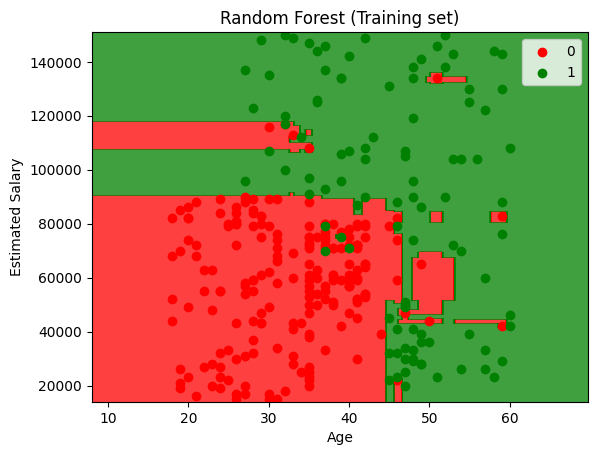

In [76]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, cls.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **Visualising Testing Result**

<ipython-input-77-94f0688d2f4c>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


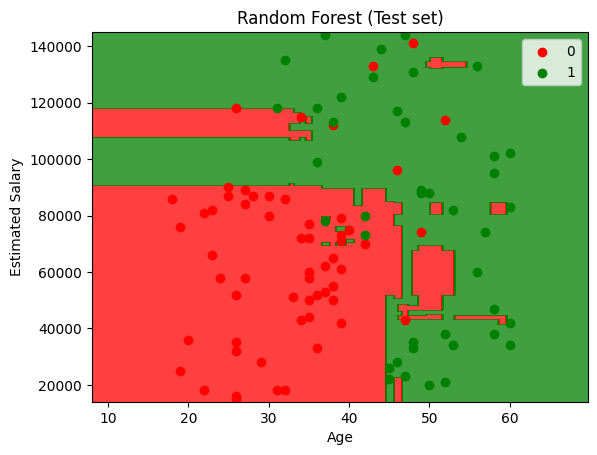

In [77]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, cls.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()